# EDA

In [14]:
# import the necessary libraries you need for your analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
# Floats (decimal numbers) should be displayed rounded with 1 decimal place
pd.set_option('display.float_format', lambda x: '%.1f' % x)
# Set style for plots
plt.style.use('fivethirtyeight') 

In [15]:
df = pd.read_csv('data/2_data_dropped.csv')

In [16]:
# display all available columns and open in separate file
for col in df.columns:
    print(col)

Unnamed: 0
Unnamed: 0.1
backers_count
description
converted_pledged_amount
country
date_creation
currency
currency_symbol
currency_trailing_code
current_currency
date_end
disable_communication
friends
fx_rate
goal_orig
id
is_backing
is_starrable
is_starred
date_launch
name
permissions
pledged_orig
slug
source_url
spotlight
staff_pick
state
date_status_change
static_usd_rate
usd_pledged
usd_type
creator_id
category_id
category_name
category_slug
category_position
category_parent_id
category_color
category_main
category_sub


# Outcome variable = State is succesful or not

In [17]:
df['state'].value_counts()

successful    94779
failed        74200
Name: state, dtype: int64

<AxesSubplot:xlabel='state', ylabel='Count'>

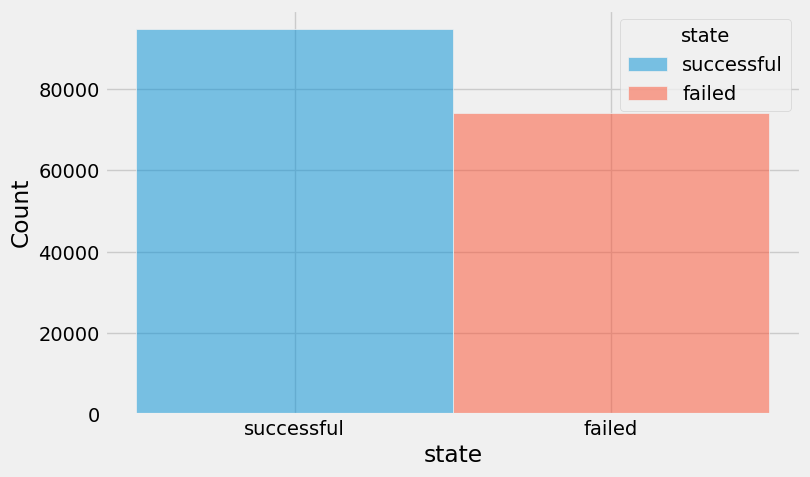

In [18]:
sns.histplot(data=df, x='state',hue='state')